# a링크 가져오기

In [1]:
import requests
from bs4 import BeautifulSoup

headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "Accept-Encoding": "false"
}

In [2]:
def getUrl(url, params=None, select=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    dom = BeautifulSoup(html.text, "html.parser")
    links = dom.select(select)
    
    return [link["href"] for link in links if link.has_attr("href") == True]

In [3]:
def getContent(url, params=None, select=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    dom = BeautifulSoup(html.text, "html.parser")
    links = dom.select(select)
    
    return links

In [4]:
seed = "http://media.daum.net/"
select = ".box_headline strong.tit_g + a"
titleList = list()
urlList = getUrl(seed, params=params, select)
urlList

SyntaxError: positional argument follows keyword argument (<ipython-input-4-6ec83a6e5c86>, line 4)

In [ ]:
for url in urlList:
    titleList.append(getContent(seed+url, params, select))
    
for title in titleList:
    print(title[0].get_text())

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
req = requests.get("http://media.daum.net/")

In [ ]:
html = req.text
html

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup

In [ ]:
select = ".box_headline .tit_g .link_txt"

In [ ]:
my_text = soup.select(select)

In [ ]:
data = {}
for my_str in my_text:
    data[my_str.text] = my_str.get(select)

print(data)

# 정답

In [155]:
import requests
from bs4 import BeautifulSoup

url = "http://media.daum.net/"


headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

In [156]:
resp = requests.get(url, headers=headers)
html = BeautifulSoup(resp.text, "lxml")
links = html.select(".list_headline .tit_g .link_txt")
links = [link.get("href") for link in links]

In [157]:
for link in links:
    print(link)

http://v.media.daum.net/v/20180802101820552
http://v.media.daum.net/v/20180802101504399
http://v.media.daum.net/v/20180802101031254
http://v.media.daum.net/v/20180802101006243
http://v.media.daum.net/v/20180802100829166
http://v.media.daum.net/v/20180802100808156
http://v.media.daum.net/v/20180802100733132
http://v.media.daum.net/v/20180802100302955
http://v.media.daum.net/v/20180802100301953
http://v.media.daum.net/v/20180802100028853
http://v.media.daum.net/v/20180802100006815
http://v.media.daum.net/v/20180802100001793


In [158]:
#key = link[0][-17:]
#key = link[0]
#key
links
key = links[5][-17:]
key

'20180802100808156'

In [159]:
for link in links:
    key = link[-17:]
    print(key)
    resp = requests.get(link, headers=headers)
    html = BeautifulSoup(resp.text, "lxml")
    content = html.select(".article_view")
    #print(content)
    
    with open("./doc/{0}".format(key), "w", encoding='UTF-8') as fp:
        fp.write(content[0].text)

20180802101820552
20180802101504399
20180802101031254
20180802101006243
20180802100829166
20180802100808156
20180802100733132
20180802100302955
20180802100301953
20180802100028853
20180802100006815
20180802100001793


In [160]:
import glob
import re

In [161]:
fileList = glob.glob('./doc/*')

In [162]:
# 파일 내용 읽어오기.
fileList = glob.glob('./doc/*')
with open(fileList[5], 'r', encoding='UTF-8') as fp:
    content = fp.read()
    # 빈칸이 최소 2개 이상인애들을 빈문자로 바꾸기.
    # 들여쓰기, 줄띄우기 된 부분 다 없애기.
    content = re.sub(r"[\s]{2,}", "", content)
    print(content)

© News1 최진모 디자이너(서울=뉴스1) 이창규 기자 = 도널드 트럼프 미국 대통령이 제프 세션스 법무부 장관에게 러시아의 대선 개입 의혹, 이른바 '러시아 스캔들'과 관련한 특별검사 수사를 중단하도록 할 것을 지시해 논란이 되고 있다.CNN은 31일(현지시간) 트럼프 대통령의 트윗은 그동안 세션스 장관과 로버트 뮬러 특검, 러시아의 대선 개입에 대한 조사 등에 대해 불만을 제기한 것에서 한발 더 나간 것이라고 전했다.
이날 트럼프 대통령은 자신의 트위터에 4건의 트윗을 잇달아 올리면서 "이는 끔찍한 상황이다. 제프 세션스 법무부 장관은 이 마녀사냥이 우리나라를 더 더럽히기 전에 당장 중단시켜야 한다"고 밝혔다.트럼프 대통령의 이 같은 트윗은 '사법방해'로 해석돼 탄핵 사유가 될 수도 있다. 앞서 지난달 26일 뉴욕타임스(NYT)는 뮬러 특검이 트럼프 대통령의 트윗을 사법방해 요소에 해당하는 지 조사하고 있다고 보도했다.ABC뉴스는 백악관 소식통들을 통해 트럼프 대통령은 트윗을 통해 사법방해에 대해 조사 중인 특검의 신뢰도를 공격한 것이라고 전했다.트럼프 대통령의 트윗에 대한 논란이 계속되자 백악관은 급히 진화에 나섰다.새라 샌더스 백악관 대변은 트럼프 대통령의 트윗과 관련해 "이것은 지시가 아니라 대통령의 의견"이라며 "트럼프 대통령은 특검 수사가 종료되기를 원한다"고 말했다. 이어 "트럼프 대통령은 사법방해를 하려는 게 아니다. 그는 맞서 싸우고 있는 것이다. 대통령은 자신의 의견을 제시하고 이를 분명히 말하고 있다"고 설명했다.
CNN은 이번 트럼프 대통령의 트윗에서 주목해야 할 것은 '트윗이 올라온 시점'이라며 트럼프 대통령의 대선캠프 선거대책위원장이었던 폴 매너포트의 공판과 맞물린 시점이란 점에 주목했다. 매너포트가 유죄 선고를 받게 될 경우 대통령이 느낄 압박이 더욱 거세질 가능성이 있다는 판단이 작용한 것으로 보인다.이에 따라 트럼프 대통령은 트럼프 대통령은 세션스 장관에 대한 특검수사 중단과 관련한 트윗 이후 자신의 대선캠프 선거대책위원장이었

In [163]:
# 문장단위로 자르기. 단어 단위로 자르는 거랑 다름!
import nltk

In [168]:
# sentence = nltk.sent_tokenize(content)
for sentence in nltk.sent_tokenize(content):
    # 영어 싹다없애기
    # nltk이용 : word단위로 자르기. 근데 우린 한글을 다루니까 이거안쓰고! regex가지고 자를거임.
    #words = nltk.word_tokenize(sentence)
    words = nltk.regexp_tokenize(sentence, r"[0-9ㄱ-ㅎㅏ-ㅣ가-힣]+")
    print(words)
    # sentence = re.sub(r"[\s\W]+", "", sentence)
    # 문장단위로 잘라서 끝에 end문자 붙여서 출력.
#    print(words, end="\n\n")
    print(sentence, end="\n\n")
    
    #????????????????????음??????????????????????????????????????????

['1', '최진모', '디자이너', '서울', '뉴스1', '이창규', '기자', '도널드', '트럼프', '미국', '대통령이', '제프', '세션스', '법무부', '장관에게', '러시아의', '대선', '개입', '의혹', '이른바', '러시아', '스캔들', '과', '관련한', '특별검사', '수사를', '중단하도록', '할', '것을', '지시해', '논란이', '되고', '있다', '은', '31일', '현지시간', '트럼프', '대통령의', '트윗은', '그동안', '세션스', '장관과', '로버트', '뮬러', '특검', '러시아의', '대선', '개입에', '대한', '조사', '등에', '대해', '불만을', '제기한', '것에서', '한발', '더', '나간', '것이라고', '전했다']
© News1 최진모 디자이너(서울=뉴스1) 이창규 기자 = 도널드 트럼프 미국 대통령이 제프 세션스 법무부 장관에게 러시아의 대선 개입 의혹, 이른바 '러시아 스캔들'과 관련한 특별검사 수사를 중단하도록 할 것을 지시해 논란이 되고 있다.CNN은 31일(현지시간) 트럼프 대통령의 트윗은 그동안 세션스 장관과 로버트 뮬러 특검, 러시아의 대선 개입에 대한 조사 등에 대해 불만을 제기한 것에서 한발 더 나간 것이라고 전했다.

['이날', '트럼프', '대통령은', '자신의', '트위터에', '4건의', '트윗을', '잇달아', '올리면서', '이는', '끔찍한', '상황이다']
이날 트럼프 대통령은 자신의 트위터에 4건의 트윗을 잇달아 올리면서 "이는 끔찍한 상황이다.

['제프', '세션스', '법무부', '장관은', '이', '마녀사냥이', '우리나라를', '더', '더럽히기', '전에', '당장', '중단시켜야', '한다', '고', '밝혔다', '트럼프', '대통령의', '이', '같은', '트윗은', '사법방해', '로', '해석돼', '탄핵', '사유가', '될', '수도', '있다']
제프 세션스 법무부 장관은 이 마녀사냥이 우리나라를 더 

In [169]:
for sentence in nltk.sent_tokenize(content):
    sentence = re.sub(r"[\s\W]+", "", sentence)
    words=[]
#     for i in range(len(sentence)):
#         words.append(sentence[i:i+2])
    for word in words:
        tokens = []
        for i in range(len(word)):
            if i+1 < len(word):
                tokens.append(word[i:i+2])
        print(word)
        print(tokens, end="\n\n")

In [172]:
for sentence in nltk.sent_tokenize(content):
#     words=nltk.word_tokenize(sentence)# 띄어쓰기로 자르기
    words=nltk.regexp_tokenize(sentence, r'[ㄱ-하-ㅣ가-힣0-9]+')#숫자와 한글만 남게 자르기
#     sentence=re.sub(r'[\s\W]+', '', sentence)#모두 2글자씩 자르기 =-> 컴퓨터가 좋으면 써도 됨
#     words=[]
    
#     for i in range(len(sentence)):
#         words.append(sentence[i:i+2])
#    print(words)
    for word in words:
        tokens=[]
        
        for i in range(len(word)):
            if i+1<len(word):
                tokens.append(word[i:i+2])
            
        print(word)
        print(tokens, end='\n\n')
# #      print(words, end='\n\n')

1
[]

최진모
['최진', '진모']

디자이너
['디자', '자이', '이너']

서울
['서울']

뉴스1
['뉴스', '스1']

이창규
['이창', '창규']

기자
['기자']

도널드
['도널', '널드']

트럼프
['트럼', '럼프']

미국
['미국']

대통령이
['대통', '통령', '령이']

제프
['제프']

세션스
['세션', '션스']

법무부
['법무', '무부']

장관에게
['장관', '관에', '에게']

러시아의
['러시', '시아', '아의']

대선
['대선']

개입
['개입']

의혹
['의혹']

이른바
['이른', '른바']

러시아
['러시', '시아']

스캔들
['스캔', '캔들']

과
[]

관련한
['관련', '련한']

특별검사
['특별', '별검', '검사']

수사를
['수사', '사를']

중단하도록
['중단', '단하', '하도', '도록']

할
[]

것을
['것을']

지시해
['지시', '시해']

논란이
['논란', '란이']

되고
['되고']

있다
['있다']

은
[]

31일
['31', '1일']

현지시간
['현지', '지시', '시간']

트럼프
['트럼', '럼프']

대통령의
['대통', '통령', '령의']

트윗은
['트윗', '윗은']

그동안
['그동', '동안']

세션스
['세션', '션스']

장관과
['장관', '관과']

로버트
['로버', '버트']

뮬러
['뮬러']

특검
['특검']

러시아의
['러시', '시아', '아의']

대선
['대선']

개입에
['개입', '입에']

대한
['대한']

조사
['조사']

등에
['등에']

대해
['대해']

불만을
['불만', '만을']

제기한
['제기', '기한']

것에서
['것에', '에서']

한발
['한발']

더
[]

나간
['나간']

것이라고
['것이', '이라', '라고']

전했다
['전했', '했다']

이날
['이날']

트럼프
['트럼', '럼프']

대통령은
['

In [173]:
# 형태소 분석기 안써도 이정도 하면 꽤 괜찮음. 왜 이런 과정을 겪엇는지가 중요함.
# 우린 형태소 분석기쓸거임.ㅋ
#    print(sentence)
#    print(words, end="\n\n")

# indentation 오류??????????????????????????????????

In [174]:
from konlpy.tag import Kkma

In [176]:
for sentence in nltk.sent_tokenize(content):
    # 명사만 가지고도 의미 전달이 됨.
    words = Kkma().nouns(sentence)
    print(sentence)
    print(words)
# 중복된 단어는 또 words로 나오지 않는구나. => 빈도수 셀 수 없음.
# 따라서 for문을 한번 더 돌거임.

© News1 최진모 디자이너(서울=뉴스1) 이창규 기자 = 도널드 트럼프 미국 대통령이 제프 세션스 법무부 장관에게 러시아의 대선 개입 의혹, 이른바 '러시아 스캔들'과 관련한 특별검사 수사를 중단하도록 할 것을 지시해 논란이 되고 있다.CNN은 31일(현지시간) 트럼프 대통령의 트윗은 그동안 세션스 장관과 로버트 뮬러 특검, 러시아의 대선 개입에 대한 조사 등에 대해 불만을 제기한 것에서 한발 더 나간 것이라고 전했다.
['1', '최', '모', '디자이너', '서울', '뉴스', '뉴스1', '창', '창규', '규', '기자', '도', '도널드', '널드', '트럼프', '미국', '대통령', '저', '프', '션스', '법무부', '장관', '러시아', '대선', '개입', '의혹', '스캔들', '과', '관련', '특별', '특별검사', '검사', '수사', '중단', '지시', '논란', '31', '31일', '일', '현지', '현지시간', '시간', '트윗', '그동안', '로버트', '뮬', '뮬러', '러', '특검', '조사', '등', '불만', '제기']
이날 트럼프 대통령은 자신의 트위터에 4건의 트윗을 잇달아 올리면서 "이는 끔찍한 상황이다.
['이날', '트럼프', '대통령', '자신', '트위터', '4', '4건', '건', '트윗', '이', '상황']
제프 세션스 법무부 장관은 이 마녀사냥이 우리나라를 더 더럽히기 전에 당장 중단시켜야 한다"고 밝혔다.트럼프 대통령의 이 같은 트윗은 '사법방해'로 해석돼 탄핵 사유가 될 수도 있다.
['저', '프', '션스', '법무부', '장관', '마녀', '마녀사냥', '사냥', '우리', '우리나라', '나라', '전', '당장', '중단', '고', '트럼프', '대통령', '이', '트윗', '사법', '사법방해', '방해', '로', '해석', '탄핵', '사유', '수']
앞서 지난달 26일 뉴욕타임스(NYT)는 뮬러 특검이 트럼프 대통령의 트윗을 사법방해 요소에 

In [177]:
uniqNouns = []

for sentence in nltk.sent_tokenize(content):
    nouns = []
    for word in nltk.word_tokenize(sentence):
        # append보단 extend가 나음.
        nouns.extend(Kkma().nouns(word))
    print(sentence)
    print(nouns)
    
# 한 문장 안에서 중복해서 나온 단어들도 모두 명사처리되어서 단어로 출력됨.
# 따라서, 빈도수 셀 수 잇게됨.

© News1 최진모 디자이너(서울=뉴스1) 이창규 기자 = 도널드 트럼프 미국 대통령이 제프 세션스 법무부 장관에게 러시아의 대선 개입 의혹, 이른바 '러시아 스캔들'과 관련한 특별검사 수사를 중단하도록 할 것을 지시해 논란이 되고 있다.CNN은 31일(현지시간) 트럼프 대통령의 트윗은 그동안 세션스 장관과 로버트 뮬러 특검, 러시아의 대선 개입에 대한 조사 등에 대해 불만을 제기한 것에서 한발 더 나간 것이라고 전했다.
['1', '최', '디자이너', '서울', '뉴스', '뉴스1', '1', '창', '창규', '규', '기자', '도', '도널', '널', '트럼프', '미국', '대통령', '저', '프', '션', '법무부', '장관', '러시아', '대선', '의혹', '러시아', '스캔들', '과', '관련', '특별', '특별검사', '검사', '수사', '중단', '지시', '논란', '은', '31', '31일', '일', '현지', '현지시간', '시간', '트럼프', '대통령', '트윗', '그동안', '션', '장관', '로버트', '뮬', '뮬러', '러', '특검', '러시아', '대선', '개입', '조사', '등에', '불만', '제기', '더', '나간']
이날 트럼프 대통령은 자신의 트위터에 4건의 트윗을 잇달아 올리면서 "이는 끔찍한 상황이다.
['이날', '트럼프', '대통령', '자신', '트위터', '4', '4건', '건', '트윗', '이', '상황']
제프 세션스 법무부 장관은 이 마녀사냥이 우리나라를 더 더럽히기 전에 당장 중단시켜야 한다"고 밝혔다.트럼프 대통령의 이 같은 트윗은 '사법방해'로 해석돼 탄핵 사유가 될 수도 있다.
['저', '프', '션', '법무부', '장관', '이', '마녀', '마녀사냥', '사냥', '우리', '우리나라', '나라', '더', '전', '당장', '중단', '고', '트럼프', '대통령', '이', '트윗', '사법', '사법방해', '방해', '로', '해석', '

In [178]:
# 181 차원의 벡터로 이루어진 문서로 표현..
# 문서 하나 열어서 작업한거.
uniqNouns = []

for sentence in nltk.sent_tokenize(content):
    nouns = []
    for word in nltk.word_tokenize(sentence):
        nouns.extend(Kkma().nouns(word))
        nouns = list(set(nouns))
    
    uniqNouns.extend(nouns)
    uniqNouns = list(set(uniqNouns))
    
print(len(uniqNouns), uniqNouns)

159 ['금융활동', '선고', '검사', '도', '종료', '폴', '프', '특검', '수사', '26', '신뢰도', '새라', '서울', '러', '등', '스캔들', '대통령', '지난해', '설명', '정치인', '중인', '게', '대선캠프', '디자이너', '로널드', '중단', '기자', '가능성', '현지', '이', '혐의', '탄핵', '일', '26일', '해당', '며', '가을', '특별', '개입', '거세', '10월', '예상', '창', '수도', '자신', '이후', '진화', '마녀사냥', '뉴스', '나간', '매너', '뮬', '건', '우리나라', '매너포트', '우리', '선거', '돌', '특별검사', '이것', '압박', '널드', '도널', '법무부', '뉴욕타임스', '캠프', '제기', '샌더', '위원장', '미국', '4', '계속', '지시', '이날', '공판', '10', '밥', '이번', '더', '그', '뉴욕', '최', '트럼프', '4건', '의혹', '결과', '작용', '사냥', '경우', '등에', '31', '현지시간', '로버트', '고', '그동안', '보도', '저', '사법', '나라', '널', '거짓말', '전', '트위터', '해석', '존경', '불만', '31일', '과', '처음', '타임스', '로', '지난달', '월', '소식통', '장관', '션', '시점', '올해', '러시아', '마녀', '뮬러', '의견', '특검수사', '뉴스1', '유죄', '시간', '트윗', '비호', '지', '조사', '상황', '당장', '공격', '은', '논란', '금융', '방해', '대선', '주목', '기소', '관련', '사법방해', '활동', '백악관', '선거대책위원장', '1', '포트', '점', '규', '불법적', '시작', '레이건', '대변', '요소', '판단', '제시', '공모', '창규', '대책']


In [179]:
print(len(uniqNouns))

159


In [199]:
# 각 문서에 벡터값을 채우는 일.
# 각 문서에 id가 누군지 알아야함.
# 문서의 이름으로 고유한 키값17자리를 이름붙임.

# pandas이용해서 차원을 벡터로 표현할거임.

docNouns = {}
maxCount = {}
# {문서1:5, 문서2:7, ...} => 문서1에서 가장많이나온 단어의 빈도수는 5,....

for file in fileList:
    docid = file[-17:]
    
    with open(file, "r", encoding='UTF-8') as fp:
        # maxCount 초기화.
        maxCount[docid] = 0
        content = fp.read()
        content = re.sub(r"[\s]{2,}", "", content)
    
    nouns = {}

    for sentence in nltk.sent_tokenize(content):
        # 각 문장에 있는 단어들의 빈도를 기술.
        # dic형태로. key값은 unique한 단어, vlaues는 +1    
        for word in nltk.word_tokenize(sentence):
            for w in Kkma().nouns(word):
                if w in nouns.keys():
                    nouns[w]+=1
                else:
                    nouns[w] = 1
                if maxCount[docid] < nouns[w]:
                    maxCount[docid] = nouns[w]
    docNouns[docid] = nouns

In [200]:
for k, v in docNouns.items():
    # 문서의 이름 - feature의 개수/최대값.
    print("{0} - {1}/{2}".format(k, len(v), maxCount[k]))
    
# 얼마나 많은 feature라고 할만한 애들이 잇는지 출력됨.

20180802100001793 - 396/28
20180802100006815 - 228/11
20180802100028853 - 192/12
20180802100301953 - 463/40
20180802100302955 - 326/18
20180802100733132 - 159/17
20180802100808156 - 217/12
20180802100829166 - 247/7
20180802101006243 - 250/14
20180802101031254 - 223/17
20180802101504399 - 228/18
20180802101820552 - 169/18


In [201]:
docNouns = {} # 문서들 각각의 단어들 수집. key:문서이름, value:문서에 포함된 단어.
maxCount = {} 

for file in fileList:
    docid = file[-17:]
    
    with open(file, "r", encoding='UTF-8') as fp:
        maxCount[docid] = 0 #초기화
        content = fp.read()
        content = re.sub(r"[\s]{2,}","",content)
    
    nouns = {}
    
    for sentence in nltk.sent_tokenize(content):
        for word in nltk.word_tokenize(sentence):
            for w in Kkma().nouns(word):
                if w in nouns:
                    nouns[w] += 1
                else:
                    nouns[w] = 1
                
                if maxCount[docid] < nouns[w]:
                    maxCount[docid] = nouns[w]
                    
            uniqNouns.extend(nouns)
            uniqNouns = list(set(uniqNouns))
                    
    docNouns[docid] = nouns
print(len(uniqNouns)) # 1352개의 유니크한 명사 단어들을 수집함

2199


In [202]:
for k, v in docNouns.items():
    # 문서의 이름 - feature의 개수/최대값.
    print("{0} - {1}/{2}".format(k, len(v), maxCount[k]))

20180802100001793 - 396/28
20180802100006815 - 228/11
20180802100028853 - 192/12
20180802100301953 - 463/40
20180802100302955 - 326/18
20180802100733132 - 159/17
20180802100808156 - 217/12
20180802100829166 - 247/7
20180802101006243 - 250/14
20180802101031254 - 223/17
20180802101504399 - 228/18
20180802101820552 - 169/18


# inverted Index

In [203]:
invertedIndex = {}
for noun in uniqNouns:
    invertedIndex[noun] = []
    
    for k, v in docNouns.items():
        if noun in v:
            invertedIndex[noun].append(k)
            
print(invertedIndex)

{'추진법안': ['20180802100302955'], '나중': ['20180802100301953'], '상대적': ['20180802101031254'], '책임자': ['20180802100301953', '20180802100808156'], '관광안내책자': ['20180802100028853'], '셀트리': ['20180802100829166'], '쌍용': ['20180802100301953'], '장면': ['20180802101504399'], '출마': ['20180802101006243'], '주무': ['20180802100808156'], '법정': ['20180802101504399'], '스탠더드': ['20180802100829166'], '예사': ['20180802101031254'], '소속': ['20180802100006815', '20180802100302955'], '스캔들': ['20180802100733132'], '관리실': ['20180802100028853'], '주택자': ['20180802101031254'], '뉴타운': ['20180802101031254'], '랫줄': ['20180802101504399'], '12개': ['20180802100006815'], '196': ['20180802100301953'], '사진공동취재단': ['20180802100001793'], '어비': ['20180802100829166'], '셀': ['20180802100829166'], '최선': ['20180802101504399', '20180802101820552'], '현지': ['20180802100733132', '20180802100808156', '20180802101006243'], '법무': ['20180802101006243'], '유추': ['20180802100301953'], '늑장': ['20180802100808156'], '부서': ['20180802100301953'], '크롤

# TF-IDF 공식 사용

In [212]:
# 1)docNouns : TF 정보 key,value로 저장해놓음.
# 2)maxCount
# 3)uniqNouns
#     => 4)invertedIndex 뭉치들 만듦.
#maxCount

kRation = 0.5 # 임의의 K값(0-1사이.)
TF={}
tfList = {}

for k,v in docNouns.items():
    # k : 문서id.
    # v : 해당 문서에 대한 "단어:빈도"쌍의 리스트.
    for w in v:
        #print(v[w])
        #print(maxCount[w])
        # w : 단어 하나.
        # 문서 하나씩 열어서 쭉 저장할거임.
        # v[w] : w에 대한 빈도수.
        # maxCount[k] : 문서id별로 w빈도수 중 최댓값.
        tfList[w] = kRation + (1 - kRation) * (v[w] / maxCount[k])
        #print("{0} | {1}+{2}*{3}/{4} = {5}".format(w, kRation, (1 - kRation), v[w], maxCount[k], tfList[w]))
    TF[k] = tfList
TF

{'20180802100001793': {'남북': 0.9107142857142857,
  '장성급': 0.875,
  '회담': 1.0,
  '현재': 0.5277777777777778,
  '총': 0.5277777777777778,
  '9': 0.5277777777777778,
  '9차례': 0.5178571428571429,
  '차례': 0.5125,
  '지난달': 0.6176470588235294,
  '31': 0.5833333333333334,
  '31일': 0.5833333333333334,
  '일': 0.6388888888888888,
  '9차': 0.5357142857142857,
  '차': 0.5714285714285714,
  '군사': 0.7142857142857143,
  '군사회담': 0.6428571428571428,
  '판문점': 0.6607142857142857,
  '공동': 0.6111111111111112,
  '공동경비구역': 0.5178571428571429,
  '경비': 0.5178571428571429,
  '구역': 0.5714285714285714,
  '비무장': 0.5357142857142857,
  '비무장지대': 0.5178571428571429,
  '지대': 0.5178571428571429,
  '공동유해': 0.5178571428571429,
  '유해': 0.5178571428571429,
  '발굴': 0.5178571428571429,
  '내': 0.525,
  '전방': 0.5357142857142857,
  '전방초소': 0.5178571428571429,
  '초소': 0.5178571428571429,
  '시범': 0.5178571428571429,
  '상호': 0.5535714285714286,
  '철수': 0.5178571428571429,
  '서해': 0.7857142857142857,
  '해상': 0.6071428571428571,
  '적대': 0.

In [92]:
# from math import log10
# docSize = len(fileList)
# TFIDF={}

# for k,v in invertedIndex.items():
#     for docid in v:
#         for term in TF[docid]:
#             idf = log10(docSize/len(invertedIndex[t]))
#             # len(v) : 어떤키워드 k에 대해, k가 몇번 나왔는지.
#             idfList[k].v[t] * idf
#         T

In [232]:
from math import log10
docSize = len(fileList)
TFIDF={}
# print(TF)

# k : 문서id
# v : {단어:TF값} 의 리스트
for k,v in TF.items():
    idfList = {}
    
    for t in v:
        # t : 문서 안의 단어 하나.
        idf = log10(docSize/len(invertedIndex[t]))
        idfList[t] = v[t] * idf
        #print("{0} | {1} + log{2} / {3} * {4}".format(t,v[t],docSize,len(invertedIndex[t]),idfList[t]))
              
    TFIDF[k] = idfList
# docSize가 작아서 idfList[t]라는 가중치값이 크게 나오게 됨.
# docSize가 크면 idfList[t] 값이 확 떨어짐!
# threshold정해서 가중치 얼마이하면 다 지워버리면 feature의 개수를 확 줄일 수 있음. => 속도, 모델정확도 향상 가능!


# Query 분석

In [221]:
# 단어에서 문서를 분석하는 과정이랑 똑같댕.
# Ad-hoc 모델 : query에따라 그 값이 계속 바뀌게 하는 것.

query = "미국과 중국 중 미국 이겨라! 베트남"
queryNouns={}
# 문서 한개 처리하는거랑 같은의미.
maxCount = 0

# 쿼리에 문자를 많이넣을수록 성능 떨어짐.
for word in nltk.sent_tokenize(query):
    for w in Kkma().nouns(word):
        # 명사에서 추출된 w에 대하여, 있으면 하나 추가. 없으면 1 입력.
        if w in queryNouns.keys():
            queryNouns[w] += 1
        else:
            queryNouns[w] = 1
            
        if maxCount < queryNouns[w]:
            maxCount = queryNouns[w]
            
print(len(queryNouns), maxCount)
print(queryNouns)

5 1
{'미국': 1, '중국': 1, '중': 1, '라': 1, '베트남': 1}


In [225]:
# 얘도 똑같이 TF-IDF 계산해줘야함.
#1) IDF 안쓰고, Term frequency만 쓰는방법
#2) IDF를 쓰되, 학습된걸 기반으로 IDF불러오는 방법


# TF 를 0,5 써서 정규화해줬음.
queryWeight = {}

for k,v in queryNouns.items():
    queryWeight[k] = kRation + (1-kRation) * (v / maxCount)
    print("{0} | {1} + {2} * {3} / {4} = {5}".format(k, kRation, (1-kRation), v, maxCount, queryWeight[k]))
    
# query 에서 명사 추출 후, TF로 가중치를 부여했음.
# query도 새로운형태의 vector가 완성된것.
# vector로 표현되었기때문에, 없으면 걍 0임.

미국 | 0.5 + 0.5 * 1 / 1 = 1.0
중국 | 0.5 + 0.5 * 1 / 1 = 1.0
중 | 0.5 + 0.5 * 1 / 1 = 1.0
라 | 0.5 + 0.5 * 1 / 1 = 1.0
베트남 | 0.5 + 0.5 * 1 / 1 = 1.0


In [223]:
# document 의 length를 구할거임.
# 그냥, 공간에서 점 사이의 거리구하는거랑 비슷.
# 제곱의 합에 루트씌운거.
from math import sqrt

docLength = {} # 문서1:길이, 문서2:길이, ...
# TFIDF에는 key,value값이 있음. key값 : 문서ID, value값 : 가중치
# 단어1:가중치, 단어2:가중치, ...
for k,v in TFIDF.items():
    sumPow = 0.0
    
    for t in v:
        sumPow += v[t]**2
    docLength[k] = sqrt(sumPow)

print(docLength)
# 크기가 클수록 가중치가 높은애들이거나, 크기가 ?빈도수가 큰애들?
# 따라서 쿼리에 대한 weight도 구함 완료!

{'20180802100001793': 26.13668441211321, '20180802100006815': 26.13668441211321, '20180802100028853': 26.13668441211321, '20180802100301953': 26.13668441211321, '20180802100302955': 26.13668441211321, '20180802100733132': 26.13668441211321, '20180802100808156': 26.13668441211321, '20180802100829166': 26.13668441211321, '20180802101006243': 26.13668441211321, '20180802101031254': 26.13668441211321, '20180802101504399': 26.13668441211321, '20180802101820552': 26.13668441211321}


#### cosine similarity(PPT 160)

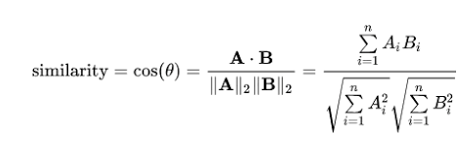

In [248]:
 #계산한 결과를 저장.
result = {}

for k,v in queryWeight.items():
    # 입력한 값이 invertedIndex의 키에 없을수도 잇으므로, 예외처리 해줘야함.
    if k in invertedIndex.keys():
#        print(k)
    
   
    
    # k : 단어, v: (0.5-1사이로 정규화된)TF값(가중치)
    # 단어를 넣으면 어느문서에서 나왓는지
    # invertedIndex[k]
    
    # 베트남은 vector 값이 0으로 처리되어 잘 걸러짐.
    # TFIDF[docid][k] : 해당문서에 k에 해당하는 가중치가 들어잇을거임.
    # k 의 성분값이랑 하나하나 곱함.
        for docid in invertedIndex[k]:
            # AB곱한것의 1~n까지의 합
            if docid in result.keys():
                result[docid] += TFIDF[docid][k] * queryWeight[k]
            else:
                # dic 초기화.
                result[docid] = TFIDF[docid][k] * queryWeight[k]
                
            #print(" -DocId:{0}, Weight:{1}".format(docid, TFIDF[docid][k]))
            
            
for k,v in result.items():
    result[k] = v / docLength[k]

#result
# 해당 문서와 얼마나 유사한지 나옴.

result = sorted(result.items(), key=lambda k:k[1], reverse=True)
# reverse=True : 내림차순 정렬. 유사도높은것부터 보이도록.
#type(result) : 리스트 형태.

for k,v in result:
    print("[{0}] 유사도 : {1}".format(k,v))
    with open("./doc/"+k, "r", encoding="utf-8") as fp:
        print(fp.readlines(20))
# {0} 부분에 href 넣고 css입히면 검색결과 링크걸어준 검색엔진만든게 되는것!

[20180802100829166] 유사도 : 0.040312930105339415
['\n', '\n', '\n', '\n', '\n', '           코스피 소폭 하락 (PG)\n']
[20180802100301953] 유사도 : 0.020923029390095306
['\n', '\n', '\n', '\n', '\n', '■ 방송 : CBS 라디오 <김현정의 뉴스쇼> FM 98.1 (07:30~09:00)■ 진행 : 김현정 앵커■ 대담 : 박범계(더불어민주당 의원)\n']
[20180802100808156] 유사도 : 0.01736722055355343
['\n', '\n', '(서울=연합뉴스) 김문성 기자 = 91명의 목숨을 앗아간 그리스 산불 참사의 책임 소재를 놓고 유가족들과 정부 당국의 법적 싸움이 시작됐다.\n']
[20180802101006243] 유사도 : 0.016718698028385614
['\n', '\n', '\n', '\n', '\n', '           넬슨 만델라 탄생 100주년 기념행사장에서 연설하는 오바마 [연합뉴스 자료사진]\n']
[20180802100733132] 유사도 : 0.013162889191843738
['\n', '\n', '\n', '\n', '\n', '           © News1 최진모 디자이너\n']
[20180802100001793] 유사도 : 0.003555808836541875
['\n', '\n', '남북 장성급 회담은 현재까지 총 9차례 열렸다. 지난달 31일 열린 9차 장성급 군사회담에서는 △판문점 공동경비구역(JSA) 비무장화 △비무장지대(DMZ) 공동유해 발굴 △DMZ 내 전방초소(GP) 시범적 상호 철수 △서해 해상 적대 행위 금지 등 4가지 사항에 대해 공감대를 형성했다. 하지만 남북은 이날 공동보도문 발표는 없어 아쉬움을 남겼다.\n']
[20180802100028853] 유사도 : 0.003555808836541875
['\n', '\n', "(수원=연합뉴스) 최찬

In [ ]:
# keyword 임의로 넣고, daum 검색하는 검색엔진 만들엇따!!!!!!!!!!!>.<ㅋㅋ
# 언어처리하는곳에선 텍스트를 활용한 통계를기반으로 vector 로 표현한 모델. 텍스트마이닝의 일부임.
# 통계기반의 모델.
# ml기반은 아님.
# 성능평가해야함. accuracy(정확도)라고안하고, precision(정확률)과 recall이라고함. binary타입의 분류는 accuracy라고함.
# 하지만, 언어처리를 기반으로 하는 분석은, 검색한것중에서 실제 정확도가 얼마나되냐, precision, recall을 구함.
# precision과 recall은 trade-off관계.

# 중요한 성능지표 중 하나. precision과 recall의 중복정도. 겹칠
# precision : 내가 찾은것중에 정답이 얼마나잇느냐.
# accuracy : 전체 문서중에 정답률이 얼마나 되느냐.